# Interpolacijski polinomi

---

Neka je zadana $n+1$ točka

$$
T_i=(x_i,y_i), \quad i=0,1,\ldots,n,\quad x_i\neq x_j.
$$

## Standardna baza

U bazi 

$$1,x,x^2,x^3\ldots,x^n$$

kroz zadane točke prolazi __interpolacijski polinom__ $p_n(x)$,

$$p_n(x)={\displaystyle {\begin{aligned}a_{0}&+a_{1}x+a_{2}x^{2}+a_{3}x^{3}+\cdots +a_{n}x^{n}.\end{aligned}}}$$

Koeficijenti polinoma zadovoljavaju 
sustav linearnih jednadžbi $p_n(x_i)=y_i$, $i=0,\ldots,n$, odnosno

$$
\begin{bmatrix} 
1 & x_0 & x_0^2 & x_0^3 & \cdots & x_0^n \\
1 & x_1 & x_1^2 & x_1^3 & \cdots & x_1^n \\
\vdots & & & & \vdots \\
1 & x_n & x_n^2 & x_n^3 & \cdots & x_n^n \\
\end{bmatrix}
\begin{bmatrix}a_0\\ a_1 \\ \vdots \\ a_n\end{bmatrix}
=\begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n\end{bmatrix}
$$

Matrica sustava $A$ se zove __Vandermondeova matrica__. Njena determinanta dana je formulom

$$ 
\mathop{\mathrm{det}}(A)= \prod_{0\leq j<i\leq n}(x_i-x_j).
$$

Kako su sve apscise različite ($x_i\neq x_j$ za $i\neq j$), vrijedi $\mathop{\mathrm{det}}(A)\neq 0$ pa je matrica $A$ regularna i zadani sustav ima jedinstveno rješenje - dakle, 

> interpolacijski polinom je __jedinstven__.


In [1]:
using Polynomials
using Plots

In [2]:
# Generirajmo slučajne točke
using Random
Random.seed!(125)
n=6
x=rand(n)
y=rand(n)
x₀=minimum(x)
xₙ=maximum(x)

0.7197873922267197

In [3]:
# Ova datoteka sadrži funkcije za manipulaciju s Vandermondeovim matricama
include("../files/Vandermonde.jl")

Matrix (generic function with 1 method)

In [4]:
A=Vandermonde(x)

6×6 Vandermonde{Float64}:
 1.0  0.14214   0.0202038  0.00287177  0.000408193  5.80205e-5
 1.0  0.719787  0.518094   0.372917    0.268421     0.193206
 1.0  0.278979  0.0778295  0.0217128   0.00605743   0.0016899
 1.0  0.292688  0.0856663  0.0250735   0.00733872   0.00214796
 1.0  0.42021   0.176576   0.074199    0.0311791    0.0131018
 1.0  0.583067  0.339967   0.198224    0.115578     0.0673895

In [5]:
a=A\y

6-element Array{Float64,1}:
     99.17550300261269
  -1572.3306537612102
   9011.853758151265
 -23711.03345023195
  29064.814621826834
 -13433.240977140887

In [6]:
p=Polynomial(a)

Polynomial(99.17550300261269 - 1572.3306537612102*x + 9011.853758151265*x^2 - 23711.03345023195*x^3 + 29064.814621826834*x^4 - 13433.240977140887*x^5)

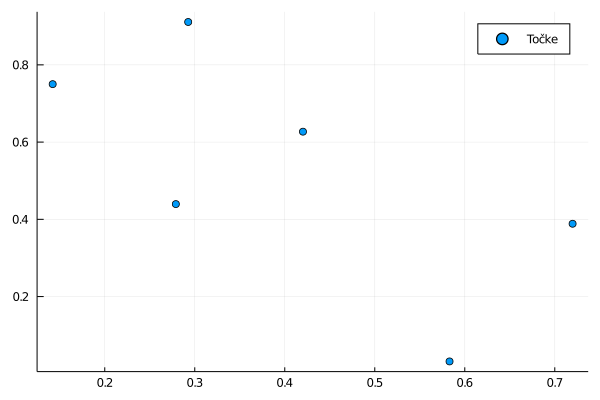

In [7]:
# Točke polinoma
scatter(x,y,label="Točke")

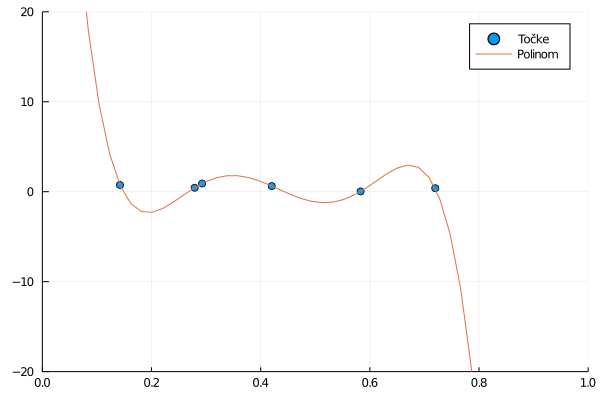

In [8]:
# Nacrtajmo polinom 
plot!(p,label="Polinom",xlims=(0,1),ylims=(-20,20))

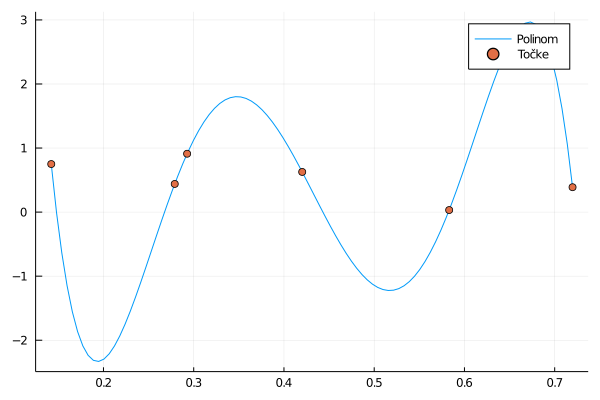

In [9]:
# Nacrtajmo polinom s našom funkcijom
xx=range(x₀,stop=xₙ,length=100)
pS=p.(xx)
plot(xx,pS,label="Polinom")
scatter!(x,y,label="Točke")

In [10]:
# Vandermondeova matrica ima veliku kondiciju
using LinearAlgebra
cond(A)

344703.54128832516

Za rješavanje zadanog sustava standardnim putem potrebno je $O(n^3)$ računskih operacija, no postoje metode kojima se Vandermondeovi sustavi mogu riješiti s $O(n^2)$ operacija.

Za izvrednjavanje polinoma u nekoj točki potrebno je $2n$ operacija (Hornerova shema).

Vandermondeove matrice uglavnom imaju veliku kondiciju pa ovaj način računanja koeficijenata polinoma može biti nestabilan.
Stoga se koriste i druge metode za računanje i izvredjavanje interpolacijskih polinoma.

## Lagrangeov interpolacijski polinom

Definirajmo $n+1$ polinom stupnja $n$:

$$
L_j(x)=\prod_{\displaystyle {i=0}\atop {\displaystyle i\neq j}}^n \frac{x-x_i}{x_j-x_i}.
$$

Vrijedi 

$$
L_j(x_i)=\begin{cases}0, \quad i\neq j \\ 1,\quad i=j \end{cases}
$$

pa je 

$$
p_n(x)=y_0\, L_0(x)+y_1 \, L_1(x)+\cdots + y_n\,  L_n(x).
$$

Za računanje nazivnika polinoma prvi put je potrebno $O(n^2)$ operacija, ali se potom vrijednost 
$p_n(x)$ računa s $O(n)$ operacija (__objasnite kako!__). 

Navodimo implementaciju algoritma koja nije optimalno brza.

In [11]:
L(t)=sum(y.*[prod(t .-x[[1:j-1;j+1:end]])/prod(x[j].-x[[1:j-1;j+1:end]]) 
        for j=1:n])

L (generic function with 1 method)

In [12]:
pL=Array{Float64}(undef,length(xx))
for i=1:length(xx)
    pL[i]=L(xx[i])
end

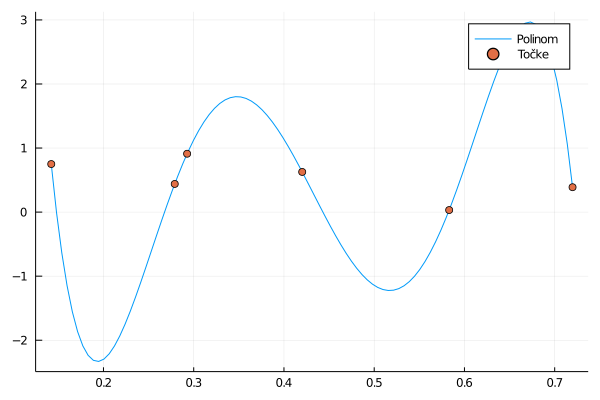

In [13]:
plot(xx,pL,label="Polinom")
scatter!(x,y,label="Točke")

In [14]:
norm(pS-pL,Inf)

2.41229258790554e-12

In [15]:
norm(abs.((pS-pL)./pL),Inf)

7.309339482863665e-11

## Newtonov interpolacijski polinom

Kod ovog polinoma koristi se baza

$$
1, x-x_0, (x-x_0)(x-x_1), (x-x_0)(x-x_1)(x-x_2),\ldots,(x-x_0)(x-x_1)\cdots (x-x_{n-1})
$$

pa je interpolacijski polinom dan s

$$
p_n(x)=c_0 + c_1(x-x_0)+c_2(x-x_0)(x-x_1)+\cdots +c_n(x-x_0)(x-x_1)\cdots (x-x_{n-1}).
$$

Koeficijenti interpolacijskog polinoma su rješenje __trokutastog__ sustava linearnih jednadžbi $Lc=y$,

$$
\begin{bmatrix} 
1 & 0 & 0 & 0 & \cdots & 0 \\
1 & x_1-x_0 & 0 & 0 & \cdots & 0 \\
1 & x_2-x_0 & (x_2-x_0)(x_2-x_1) & 0 & \cdots & 0 \\
\vdots & & & & \vdots \\
1 & x_n-x_0 & (x_n-x_0)(x_n-x_1) & (x_n-x_0)(x_n-x_1)(x_n-x_2) & \cdots & (x_n-x_0)\cdots (x_n-x_{n-1}) \\
\end{bmatrix}
\begin{bmatrix}c_0\\ c_1 \\ c_2 \\\vdots \\ a_n\end{bmatrix}
=\begin{bmatrix} y_0 \\ y_1 \\ y_2 \\ \vdots \\ y_n\end{bmatrix}.
$$

Za formiranje donje trokutaste matrice $L$ potrebno je $O(n^2)$ operacija. Za računanje koeficijenata $c_0,\ldots,c_n$ potrebno je $O(n^2)$ operacija (rješavanje donje trokutastog sustava) i to rješenje je __stabilno__.

Za računanje $p_n(x)$ koristi se postupak koji je sličan Hornerovoj shemi. 

In [16]:
# Računanje koeficijenata c
function mynewton(x,y)
    n=length(x)
    L=zeros(n,n)
    L[:,1]=ones(n)
    for i=2:n
        for j=2:i
            L[i,j]=prod([x[i]-x[k] for k=1:j-1])
        end
    end
    c=L\y
end  

mynewton (generic function with 1 method)

In [17]:
c=mynewton(x,y)

6-element Array{Float64,1}:
      0.7500494543715996
     -0.6258564936732335
      3.7290142479868957
   -561.5041252712208
   4162.211700285235
 -13433.240977129866

In [18]:
# Računanje vrijednosti Newtonovog polinoma zadanog s točkama x i 
# koeficijentima c u točki t 
function evalnewton(c,x,t::Number)
    p=c[end]
    for i=length(c)-1:-1:1
        p=p*(t-x[i])+c[i]
    end
    p
end

evalnewton (generic function with 1 method)

In [19]:
pN=Array{Float64}(undef,length(xx))
for i=1:length(xx)
    pN[i]=evalnewton(c,x,xx[i])
end

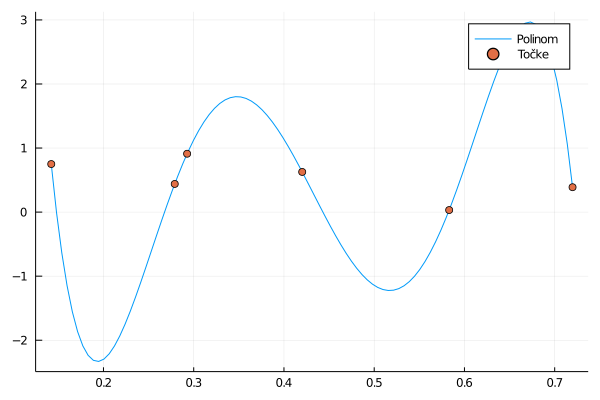

In [20]:
plot(xx,pN,label="Polinom")
scatter!(x,y,label="Točke")

In [21]:
norm(abs.((pS-pN)./pN),Inf)

7.307634170942471e-11

In [22]:
norm(abs.((pL-pN)./pN),Inf)

2.1032218128005538e-14

Vidimo da su `pN` i `pL` bliže jedan drugome nego `pS` pa zaključujemo da su zaista točniji.